# Analysis of the relation between the sensation level difference (SL BC - SL AC) with signal in front and the fitting appraisal

24 January 2022 Guido Cattani

In [1]:
from pathlib import Path
import pandas as pd
from scipy.stats import mannwhitneyu as mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_AC_thresholds():
    # read measured thresholds
    f_in = '//media/guido/LACIE/Cingle_Guido/Master/Implant/Primary_data/AC_measured_thresholds.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in)
    df.set_index('Study_ID', inplace=True)
    return df

In [3]:
def present_AC_thresholds():
    ac = read_AC_thresholds()
    ac1 = ac[['AC_500', 'AC_1000', 
              'AC_2000', 'AC_4000']].copy()
    pta = ac1.iloc[:, 1:].mean(axis='columns').round(1)
    ac1.insert(4, column= 'PTA (0.5-4 kHz)', value=pta)
    pta_hf = ac1.iloc[:, 2:].mean(axis='columns').round(1)
    ac1.insert(5, column= 'PTA_HF (1-4 kHz)', value=pta_hf)
    return ac1

In [4]:
def read_BC_direct():
    f_in = '/media/guido/LACIE/Cingle_Guido/Master/Implant/Primary_data/BCdirect.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in)
    df = df.drop(['Unnamed: 0'], axis=1)
    df.set_index('Study_ID', inplace=True)
    return df

In [5]:
def present_BCdirect_thresholds():
    bc = read_BC_direct()
    bc1 = bc[['BCdimp_500', 'BCdimp_1000', 'BCdimp_2000', 'BCdimp_4000']].copy()
    pta = bc1.iloc[:, 1:].mean(axis='columns').round(1)
    bc1.insert(4, column= 'PTA (0.5-4 kHz)', value=pta)
    pta_hf = bc1.iloc[:, 2:].mean(axis='columns').round(1)
    bc1.insert(5, column= 'PTA_HF (1-4 kHz)', value=pta_hf)
    bc1.dropna(inplace=True)
    return bc1

In [6]:
# read difference sensation levels BC - AC simulated with a 65 dB ISDS input signal at BCD side (90 degree angle)
def read_diff_sl():
    f_in = '/media/guido/LACIE/Cingle_Guido/Master/Implant/Calculated_data/Diff_SL_65dB_S_front.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in)
    df.set_index('Study_ID', drop=True, inplace=True, verify_integrity=True)
    return df

In [7]:
def read_SL_BC():
    # read sensation levels BC path in the condition with signal at BCD side
    f_in = '/media/guido/LACIE/Cingle_Guido/Master/Implant/Calculated_data/BC_SL_65dB_0deg.csv'
    p_in = Path(f_in)   
    df = pd.read_csv(p_in)
    df.set_index('Study_ID', drop=True, inplace=True, verify_integrity=True)
    return df

In [8]:
def diff_sl_filtered():
    # boolean mask func. for diff SL, CROS balance criterium
    diff_sl= read_diff_sl()
    diff_sl.dropna(inplace = True)
    criterium = -3
    pos_diff_sl = diff_sl >= criterium
    pos_diff_sl
    return pos_diff_sl

In [9]:
def sl_bc_filtered():
    # boolean mask func. for SL BC, audibility criterium of BC path
    sl_bc= read_SL_BC()
    sl_bc.dropna(inplace = True)
    criterium = 0
    pos_sl = sl_bc > criterium
    pos_sl
    return pos_sl

In [10]:
def bct_better20():
    # boolean mask func. for BC direct thresholds with criterium <= 15 dB
    bct= read_BC_direct()
    bct.dropna(inplace = True)
    criterium = 15 # criterium BC direct threshold 15 dB or lower
    btr = bct <= criterium
    btr
    return btr

In [11]:
def bct_better2():
    # function to combine criterium <=30 dB for BC direct thresholds at 2 & 4 k
    btr = bct_better20()
    combi_23 = btr['BCdimp_2000'] #& btr['BCdimp_3000']
    combi_23.name = 'BCd_<=15_3k'
    return combi_23

In [12]:
def balanced_audible():
    # in the f-band is the fitting CROS-balanced & BC SL is >= threshold
    audible = diff_sl_filtered() & sl_bc_filtered()
    audible_hf = audible.iloc[:, 12 : 16]
    audible_hf
    # in all 1.6-4k bands at meantime is the fitting CROS-balanced & BC SL is >= threshold
    clmns = audible_hf.columns
    overall = audible_hf.loc[:, 'f_2000_Hz']
    for clmn in clmns:
        overall = overall & audible_hf.loc[:, clmn]
    overall.rename('balanced & audible', inplace=True)
    return overall

In [13]:
def mwu_test(df1,df2):
    # compare distribution with Mann Whitney U test

    mwu = dict()
    f = df1.columns.values.tolist()

    for i in range(len(f)):
        a = df1.iloc[:, i]
        b = df2.iloc[:, i]
        u_statistic, pVal = mannwhitneyu(a , b, use_continuity=False, alternative='two-sided') # scipy.stats mannwhitneyu test
        pVal = round(pVal, 3)
        st = {f[i]: [u_statistic, pVal]}
        mwu.update(st)

    u_test = pd.DataFrame.from_dict(mwu, dtype='float')
    diu =  {0: 'Mann-Whitney U statistic', 1: 'p-value (two-sided)'}
    u_test = u_test.rename(index=diu)
    return u_test

In [14]:
diff_sl_filtered()

,f_125_Hz,f_160_Hz,f_200_Hz,f_250_Hz,f_315_Hz,f_400_Hz,f_500_Hz,f_630_Hz,f_800_Hz,f_1000_Hz,f_1250_Hz,f_1600_Hz,f_2000_Hz,f_2500_Hz,f_3150_Hz,f_4000_Hz,f_5000_Hz,f_6300_Hz,f_8000_Hz
Study_ID,,,,,,,,,,,,,,,,,,,
34,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,True,True,False
35,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,True,True,False
43,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
47,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False
50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
53,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
54,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True
56,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True
59,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False


In [15]:
sl_bc_filtered()

,f_125_Hz,f_160_Hz,f_200_Hz,f_250_Hz,f_315_Hz,f_400_Hz,f_500_Hz,f_630_Hz,f_800_Hz,f_1000_Hz,f_1250_Hz,f_1600_Hz,f_2000_Hz,f_2500_Hz,f_3150_Hz,f_4000_Hz,f_5000_Hz,f_6300_Hz,f_8000_Hz
Study_ID,,,,,,,,,,,,,,,,,,,
34,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False
35,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False
43,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,True,True
47,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True
50,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True
53,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False
54,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True
56,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,False,True,True,True
59,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False


In [16]:
overall = pd.DataFrame(balanced_audible())
overall

,balanced & audible
Study_ID,
34,False
35,False
43,False
47,True
50,False
53,False
54,True
56,False
59,False


In [17]:
overall.value_counts()

balanced & audible
False                 16
True                   4
dtype: int64

In [18]:
fltr_weak = overall['balanced & audible']==False
is_weak = overall[fltr_weak]
weak_cases = is_weak.index
weak_cases

Int64Index([34, 35, 43, 50, 53, 56, 59, 66, 71, 72, 73, 74, 76, 77, 80, 81], dtype='int64', name='Study_ID')

In [19]:
fltr_strong = overall['balanced & audible']==True
is_strong = overall[fltr_strong]
strong_cases = is_strong.index
strong_cases

Int64Index([47, 54, 75, 83], dtype='int64', name='Study_ID')

In [20]:
act = present_AC_thresholds()
act_weak = act.loc[weak_cases]
act_strong = act.loc[strong_cases]

In [21]:
act_weak

,AC_500,AC_1000,AC_2000,AC_4000,PTA (0.5-4 kHz),PTA_HF (1-4 kHz)
Study_ID,,,,,,
34,5,5,10,40,18.3,22.8
35,15,15,15,55,28.3,32.8
43,15,10,0,35,15.0,16.7
50,0,0,0,15,5.0,6.7
53,20,10,10,10,10.0,10.0
56,15,15,25,60,33.3,39.4
59,10,15,5,20,13.3,12.8
66,5,0,10,25,11.7,15.6
71,20,15,15,20,16.7,17.2


In [22]:
act_strong

,AC_500,AC_1000,AC_2000,AC_4000,PTA (0.5-4 kHz),PTA_HF (1-4 kHz)
Study_ID,,,,,,
47,5,10,15,15,13.3,14.4
54,15,10,15,35,20.0,23.3
75,5,5,30,30,21.7,27.2
83,5,5,15,15,11.7,13.9


In [23]:
mwu_test(act_weak,act_strong)

,AC_500,AC_1000,AC_2000,AC_4000,PTA (0.5-4 kHz),PTA_HF (1-4 kHz)
Mann-Whitney U statistic,40.500,40.000,10.500,30.500,22.000,21.500
p-value (two-sided),0.407,0.428,0.035,0.886,0.342,0.321


In [24]:
bct = read_BC_direct()
bct_weak = bct.loc[weak_cases]
bct_strong = bct.loc[strong_cases]
bct_strong

,BCdimp_250,BCdimp_500,BCdimp_750,BCdimp_1000,BCdimp_1500,BCdimp_2000,BCdimp_3000,BCdimp_4000,BCdimp_6000
Study_ID,,,,,,,,,
47,25,15,25,10,5,5,5,10,10
54,25,20,15,20,5,15,20,25,15
75,25,25,20,10,15,15,15,10,35
83,25,15,15,20,-5,0,0,15,10


In [25]:
bct_weak

,BCdimp_250,BCdimp_500,BCdimp_750,BCdimp_1000,BCdimp_1500,BCdimp_2000,BCdimp_3000,BCdimp_4000,BCdimp_6000
Study_ID,,,,,,,,,
34,25,20,15,-5,5,15,20,20,45
35,18,20,15,15,10,35,15,30,50
43,15,15,15,10,10,20,25,45,15
50,25,20,15,5,5,5,15,20,15
53,25,25,15,10,0,10,20,15,25
56,25,30,15,30,20,25,35,50,10
59,33,25,30,25,5,5,15,20,15
66,20,10,10,10,0,10,10,15,30
71,25,25,25,10,10,20,15,25,45


In [26]:
mwu_test(bct_weak,bct_strong)

,BCdimp_250,BCdimp_500,BCdimp_750,BCdimp_1000,BCdimp_1500,BCdimp_2000,BCdimp_3000,BCdimp_4000,BCdimp_6000
Mann-Whitney U statistic,32.0,43.000,27.50,34.000,44.000,46.000,45.000,44.500,46.500
p-value (two-sided),1.0,0.286,0.63,0.847,0.246,0.178,0.198,0.227,0.163


In [27]:
sw = bct_strong.join(bct_weak, how='outer', lsuffix='_strong', rsuffix='_weak')

In [28]:
sw

,BCdimp_250_strong,BCdimp_500_strong,BCdimp_750_strong,BCdimp_1000_strong,BCdimp_1500_strong,BCdimp_2000_strong,BCdimp_3000_strong,BCdimp_4000_strong,BCdimp_6000_strong,BCdimp_250_weak,BCdimp_500_weak,BCdimp_750_weak,BCdimp_1000_weak,BCdimp_1500_weak,BCdimp_2000_weak,BCdimp_3000_weak,BCdimp_4000_weak,BCdimp_6000_weak
Study_ID,,,,,,,,,,,,,,,,,,
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,20.0,15.0,-5.0,5.0,15.0,20.0,20.0,45.0
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,20.0,15.0,15.0,10.0,35.0,15.0,30.0,50.0
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,15.0,15.0,10.0,10.0,20.0,25.0,45.0,15.0
47,25.0,15.0,25.0,10.0,5.0,5.0,5.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,20.0,15.0,5.0,5.0,5.0,15.0,20.0,15.0
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,25.0,15.0,10.0,0.0,10.0,20.0,15.0,25.0
54,25.0,20.0,15.0,20.0,5.0,15.0,20.0,25.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,30.0,15.0,30.0,20.0,25.0,35.0,50.0,10.0
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,25.0,30.0,25.0,5.0,5.0,15.0,20.0,15.0


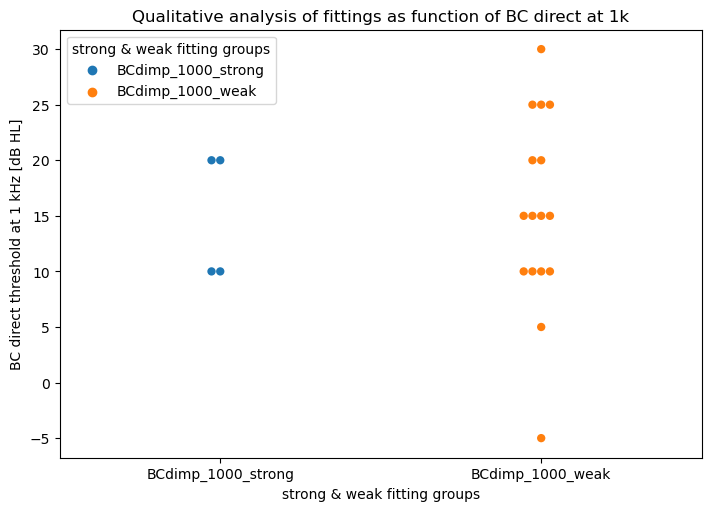

In [29]:
sw1k = sw[['BCdimp_1000_strong', 'BCdimp_1000_weak']]

# make a figure to plot BC direct threshold at 1 kHz for strong & weak fitting groups
ttl = 'Qualitative analysis of fittings as function of BC direct at 1k'

tp = pd.melt(sw1k, var_name = 'strong & weak fitting groups', value_name = 'BC direct threshold at 1 kHz [dB HL]') 

fig, ax = plt.subplots(constrained_layout=True)

fig.set_figheight(5)
fig.set_figwidth(7)

ax = sns.swarmplot(data = tp, x = 'strong & weak fitting groups', y = 'BC direct threshold at 1 kHz [dB HL]', 
                   size = 6 , hue = 'strong & weak fitting groups')

ax.set_title(ttl)
#plt.legend(bbox_to_anchor=(0.15, 0.25), fontsize='large')

plt.show()

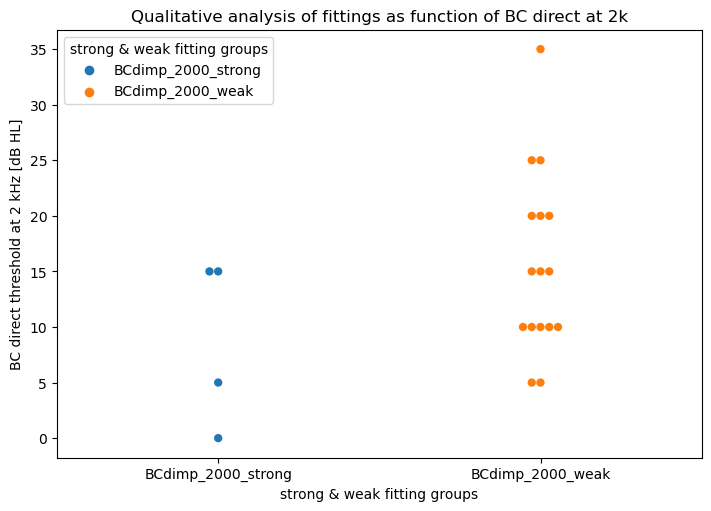

In [30]:
sw2k = sw[['BCdimp_2000_strong', 'BCdimp_2000_weak']]

# make a figure to plot BC direct threshold at 3 kHz for strong & weak fitting groups
ttl = 'Qualitative analysis of fittings as function of BC direct at 2k'

tp = pd.melt(sw2k, var_name = 'strong & weak fitting groups', value_name = 'BC direct threshold at 2 kHz [dB HL]') 

fig, ax = plt.subplots(constrained_layout=True)

fig.set_figheight(5)
fig.set_figwidth(7)

ax = sns.swarmplot(data = tp, x = 'strong & weak fitting groups', y = 'BC direct threshold at 2 kHz [dB HL]', 
                   size = 6, hue = 'strong & weak fitting groups')

ax.set_title(ttl)
#plt.legend(bbox_to_anchor=(0.15, 0.25), fontsize='large')

plt.show()

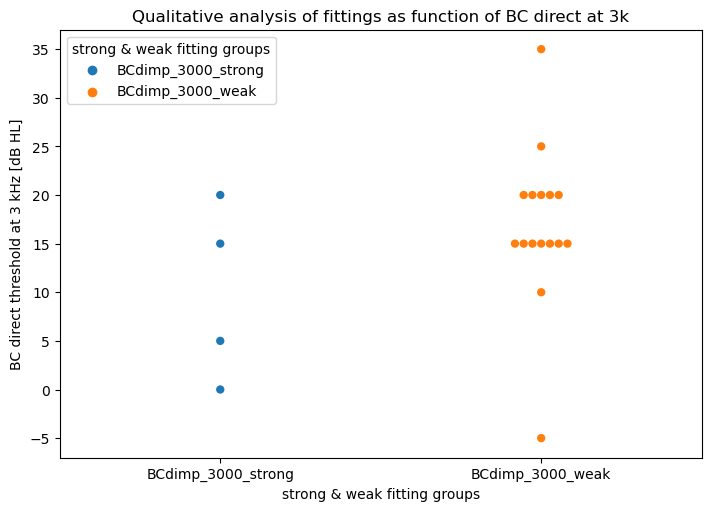

In [31]:
sw3k = sw[['BCdimp_3000_strong', 'BCdimp_3000_weak']]

# make a figure to plot BC direct threshold at 3 kHz for strong & weak fitting groups
ttl = 'Qualitative analysis of fittings as function of BC direct at 3k'

tp = pd.melt(sw3k, var_name = 'strong & weak fitting groups', value_name = 'BC direct threshold at 3 kHz [dB HL]') 

fig, ax = plt.subplots(constrained_layout=True)

fig.set_figheight(5)
fig.set_figwidth(7)

ax = sns.swarmplot(data = tp, x = 'strong & weak fitting groups', y = 'BC direct threshold at 3 kHz [dB HL]', 
                   size = 6, hue = 'strong & weak fitting groups')

ax.set_title(ttl)
#plt.legend(bbox_to_anchor=(0.15, 0.25), fontsize='large')

# save figure to file

plt.show()

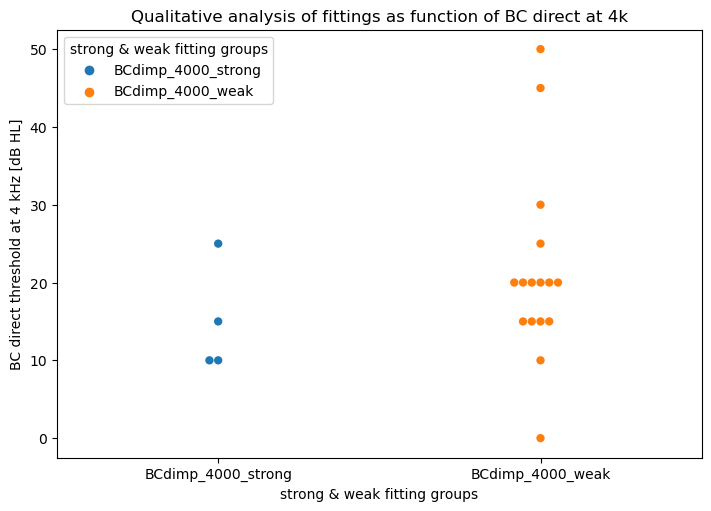

In [32]:
sw4k = sw[['BCdimp_4000_strong', 'BCdimp_4000_weak']]

# make a figure to plot BC direct threshold at 3 kHz for strong & weak fitting groups
ttl = 'Qualitative analysis of fittings as function of BC direct at 4k'

tp = pd.melt(sw4k, var_name = 'strong & weak fitting groups', value_name = 'BC direct threshold at 4 kHz [dB HL]') 

fig, ax = plt.subplots(constrained_layout=True)

fig.set_figheight(5)
fig.set_figwidth(7)

ax = sns.swarmplot(data = tp, x = 'strong & weak fitting groups', y = 'BC direct threshold at 4 kHz [dB HL]', 
                   size = 6, hue = 'strong & weak fitting groups')

ax.set_title(ttl)
#plt.legend(bbox_to_anchor=(0.15, 0.25), fontsize='large')

plt.show()

In [33]:
bcb = bct_better2()
bcb

Study_ID
34     True
35    False
43    False
47     True
50     True
53     True
54     True
56    False
59     True
66     True
71    False
72     True
73     True
74     True
75     True
76    False
77     True
80     True
81    False
83     True
Name: BCd_<=15_3k, dtype: bool

In [34]:
bcb = pd.DataFrame(bcb)
qlt = overall.join(bcb, how='outer')
qlt

,balanced & audible,BCd_<=15_3k
Study_ID,,
34,False,True
35,False,False
43,False,False
47,True,True
50,False,True
53,False,True
54,True,True
56,False,False
59,False,True


In [35]:
# number of subjects with balanced en audible SL BC
qlt['balanced & audible'].sum()

4

In [36]:
# number of subjects fulfilling criterium BCdT <= 15 dB at 2 kHz
qlt['BCd_<=15_3k'].sum()

14

In [37]:
# number of subjects with balanced en audible SL BC fulfilling criterium BCdT <= 15 dB at 2 kHz
vrf = qlt['balanced & audible'] & qlt['BCd_<=15_3k']
vrf.sum()

4

In [38]:
# number of subjects with balanced en audible SL BC not fulfilling criterium BCdT <= 15 dB at 2 kHz
vrf2 = qlt['balanced & audible'] & ~qlt['BCd_<=15_3k']
vrf2.sum()

0

In [39]:
# number of subjects with NOT balanced en audible SL BC fulfilling criterium BCdT <= 15 dB at 2 kHz
vrf3 = ~qlt['balanced & audible'] & qlt['BCd_<=15_3k']
vrf3.sum()

10

In [40]:
# sensitivity
round(vrf.sum() / qlt['balanced & audible'].sum(),2)

1.0

In [41]:
# specificity %
negatieve = len(qlt) - qlt['balanced & audible'].sum()
thrue_neg = negatieve - vrf3.sum()
round(thrue_neg / negatieve, 2)

0.38

In [42]:
# best criterium bcd<=15 dB at 2 kHz